<div align="center">

<a href="https://colab.research.google.com/drive/1Dsmby5O4RDW_qynJpMUTMiLIud3ier0B" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

</div>


<h1 align="center"> 5 Flower Types Classification Dataset </h1>


The **5 Flower Types Classification Dataset** is a collection of images belonging to five different flower classes: Lilly, Lotus, Sunflower, Orchid, and Tulip. Each flower class contains 1000 images, resulting in a total of 5000 images in the dataset.

This dataset is suitable for training and evaluating a multi-class Convolutional Neural Network (CNN) model to classify flower images into one of the five mentioned classes. The goal of the classification task is to accurately identify the type of flower from an input image.

The dataset can be used to explore various deep learning techniques for image classification, such as data augmentation, transfer learning, and model fine-tuning. It provides a challenging task due to the visual similarity and subtle differences among different flower types.

Dataset Details:
- Number of classes: 5
- Total images: 5000 (1000 images per class)
- Image format: JPG or PNG
- Image resolution: Varies (please preprocess the images to a consistent size if required)

The 5 Flower Types Classification Dataset is a valuable resource for researchers, students, and practitioners interested in the field of computer vision, specifically in image classification tasks. It can be used for educational purposes, benchmarking different models, and advancing the state-of-the-art in flower classification.

Feel free to download the dataset and start exploring the fascinating world of flower image classification!:
https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset

In [ ]:
# import libraries
import os
import shutil
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Sequential
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# Downloading and preparing data for model

In [ ]:
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

 96% 232M/242M [00:02<00:00, 104MB/s]
100% 242M/242M [00:02<00:00, 115MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: flower_images/Lilly/00048a5c76.jpg  
  inflating: flower_images/Lilly/001ff6644e.jpg  
  inflating: flower_images/Lilly/001ff6656j.jpg  
  inflating: flower_images/Lilly/00973ad1b1.jpg  
  inflating: flower_images/Lilly/00a7d512d6.jpg  
  inflating: flower_images/Lilly/00f36a3c40.jpg  
  inflating: flower_images/Lilly/013628cccc.jpg  
  inflating: flower_images/Lilly/01998d6fb5.jpg  
  inflating: flower_images/Lilly/01a0ec319c.jpg  
  inflating: flower_images/Lilly/01b4bb0289.jpg  
  inflating: flower_images/Lilly/025ef3ea44.jpg  
  inflating: flower_images/Lilly/02a7a2df46.jpg  
  inflating: flower_images/Lilly/02be2ca388.jpg  
  inflating: flower_images/Lilly/035cce082f.jpg  
  inflating: flower_images/Lilly/039eba79d4.jpg  
  inflating: flower_images/Lilly/04067b91d6.jpg  
  inflating: flower_images/Lilly/04acfd5449.jpg  
  inflating: flower_images/Lilly/05777790e2.jpg  
  inflating: flower_images/Lilly/05b341b09f.jpg  

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
src_dir = '/content/flower_images'
dst_dir = '/content/Data'

## Data preprocessing (image augmentation)

In [ ]:
splitfolders.ratio(input=src_dir, output=dst_dir, ratio=(0.8, 0.2))

Copying files: 5000 files [00:00, 5625.05 files/s]


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255., rotation_range=0.2,
                                  #  brightness_range=(0.2, 0.5),
                                   zoom_range=0.2, shear_range=0.2,
                                   horizontal_flip=True)
train_dataset = train_datagen.flow_from_directory('/content/Data/train',
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  shuffle=True)


val_datagen = ImageDataGenerator(rescale=1/255.)
val_dataset = val_datagen.flow_from_directory('/content/Data/val', target_size=(150, 150),
                                              batch_size=32, shuffle=False)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


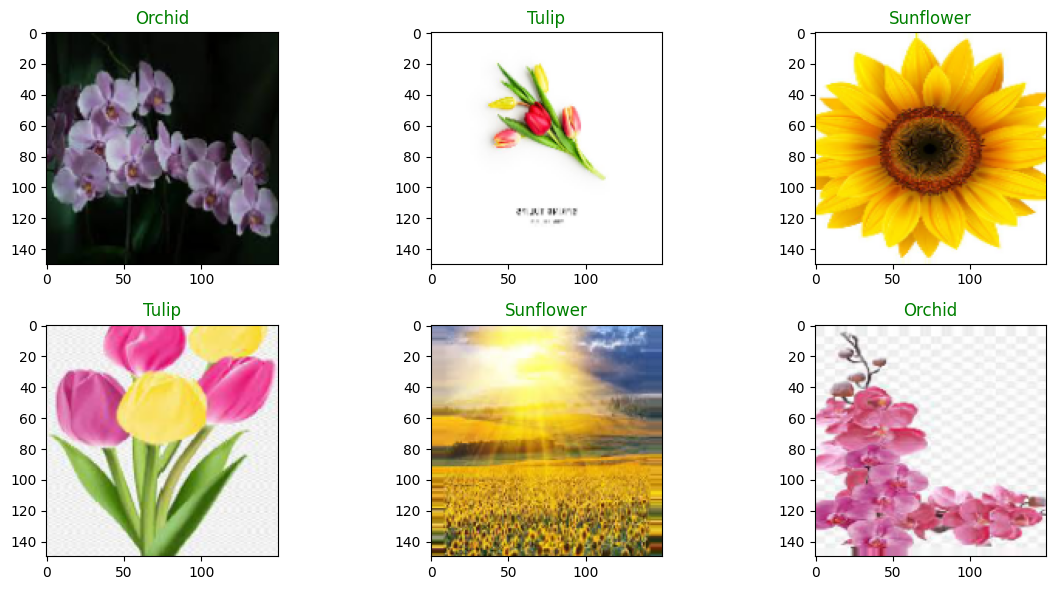

In [ ]:
images, labels = next(train_dataset)
labels = np.argmax(labels, axis=1)
class_names = list(train_dataset.class_indices.keys())
def plot_random_images(images, labels, class_names):
    plt.figure(figsize=(12, 6))

    for i in range(6):
        ax = plt.subplot(2, 3, i+1)
        rand_index = random.choice(range(len(images)))
        plt.imshow(images[rand_index])
        plt.title(class_names[labels[rand_index]], color='green', fontsize=12)

    plt.tight_layout()
    plt.show()

plot_random_images(images, labels, class_names)

## creating model

In [ ]:
model = Sequential([

                    Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu', input_shape=(150, 150, 3)),
                    MaxPool2D(pool_size=(2,2), strides=2, padding='valid'),

                    Conv2D(filters=32, kernel_size=(3,3), strides=2, activation='relu'),
                    MaxPool2D(pool_size=(2,2), strides=1, padding='same'),

                    Conv2D(filters=64, kernel_size=(3,3), strides=2, activation='relu'),
                    MaxPool2D(pool_size=(2,2), strides=1, padding='same'),

                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(5, activation='softmax')

])

In [ ]:
model.compile(optimizer=Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
history = model.fit(train_dataset, epochs=15, validation_data=(val_dataset))

Epoch 1/15
125/125 [==============================] - 69s 411ms/step - loss: 1.2671 - accuracy: 0.4565 - val_loss: 1.1449 - val_accuracy: 0.5250
Epoch 2/15
125/125 [==============================] - 50s 399ms/step - loss: 1.0477 - accuracy: 0.5885 - val_loss: 1.0282 - val_accuracy: 0.6100
Epoch 3/15
125/125 [==============================] - 48s 387ms/step - loss: 0.9237 - accuracy: 0.6470 - val_loss: 0.9004 - val_accuracy: 0.6420
Epoch 4/15
125/125 [==============================] - 48s 386ms/step - loss: 0.8279 - accuracy: 0.6775 - val_loss: 0.8699 - val_accuracy: 0.6850
Epoch 5/15
125/125 [==============================] - 49s 390ms/step - loss: 0.7596 - accuracy: 0.7138 - val_loss: 0.8166 - val_accuracy: 0.6950
Epoch 6/15
125/125 [==============================] - 50s 398ms/step - loss: 0.6770 - accuracy: 0.7347 - val_loss: 0.7740 - val_accuracy: 0.7160
Epoch 7/15
125/125 [==============================] - 53s 422ms/step - loss: 0.5846 - accuracy: 0.7760 - val_loss: 0.7458 - val_ac

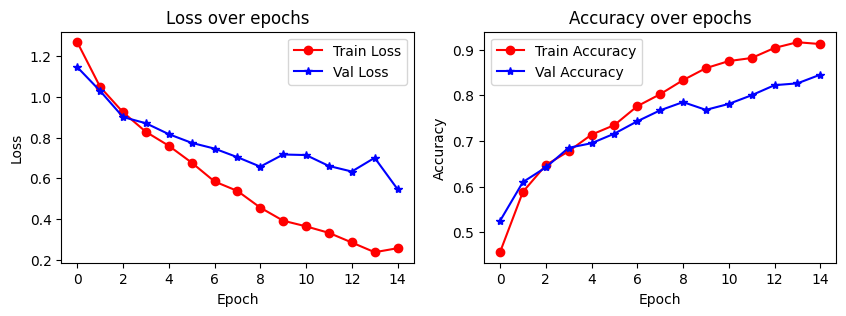

In [ ]:
loss_df = pd.DataFrame(history.history)

def plot_predictions(data=loss_df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

    ax1.plot(loss_df['loss'], color='red',marker='o', label='Train Loss')
    ax1.plot(loss_df['val_loss'], color='blue',marker='*', label='Val Loss')

    ax1.set_title('Loss over epochs')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(loss_df['accuracy'], color='red',marker='o', label='Train Accuracy')
    ax2.plot(loss_df['val_accuracy'], color='blue',marker='*', label='Val Accuracy')

    ax2.set_title('Accuracy over epochs')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
plot_predictions(loss_df)

# making predictions

In [ ]:
predictions = np.argmax(model.predict(val_dataset), axis=1)
y_true = val_dataset.labels

32/32 [==============================] - 6s 172ms/step


In [ ]:
print(accuracy_score(predictions, y_true))

0.845


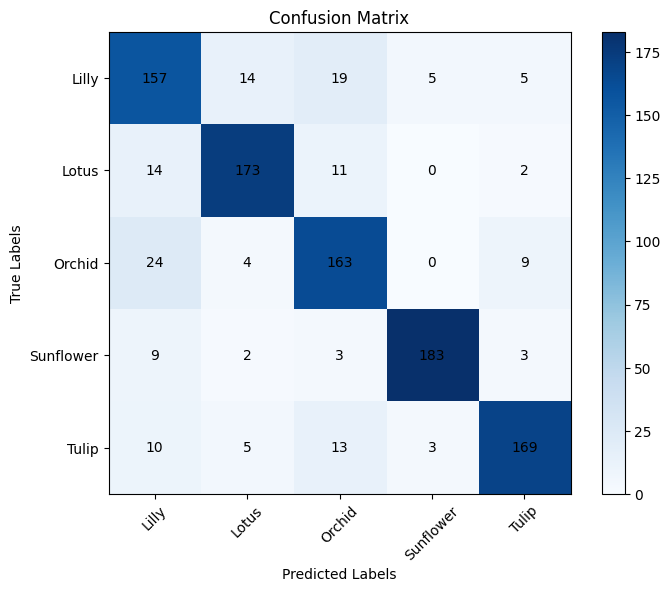

In [ ]:
def plot_confusion_matrix(y_true, predictions, class_names):

    cm = confusion_matrix(y_true, predictions)
    plt.figure(figsize=(8, 6))
    heatmap = plt.imshow(cm, cmap='Blues')

    # Set axis labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    # Set xticks and yticks with class names
    tick_labels = class_names
    plt.xticks(ticks=np.arange(len(class_names)), labels=tick_labels, rotation=45)
    plt.yticks(ticks=np.arange(len(class_names)), labels=tick_labels)

    # Add numbers to the heatmap cells
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

    plt.colorbar(heatmap)
    plt.show()
plot_confusion_matrix(y_true, predictions, class_names)

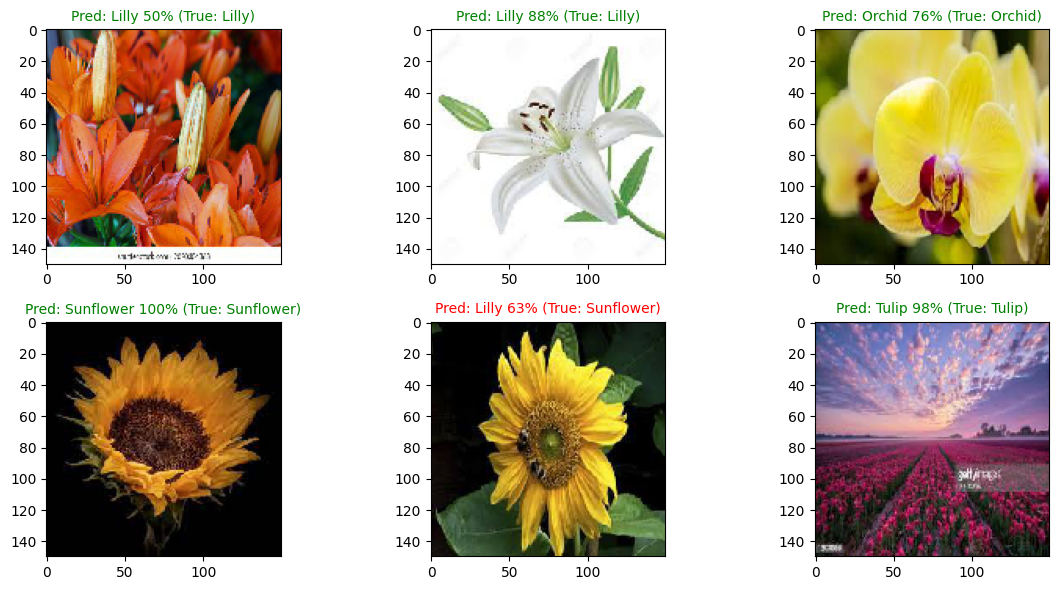

In [ ]:
def plot_random_image(model, val_data, classes):

    images = []
    labels = []
    for _ in range(len(val_data)):
        batch_images, batch_labels = next(val_data)
        images.extend(batch_images)
        labels.extend(batch_labels)

    # Shuffle the images and labels together
    combined = list(zip(images, labels))
    random.shuffle(combined)
    images, labels = zip(*combined)
    labels = np.argmax(labels, axis=1)
    plt.figure(figsize=(12, 6))
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        rand_index = random.choice(range(len(images)))
        target_image = images[rand_index]
        pred_probs = model.predict(tf.expand_dims(target_image, axis=0), verbose=0)
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[labels[rand_index]]

        plt.imshow(target_image)

        if pred_label == true_label:
            color = "green"
        else:
            color = "red"

        plt.title("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                        100 * tf.reduce_max(pred_probs),
                                                        true_label),
                  color=color, fontsize=10)

    plt.tight_layout()
plot_random_image(model, val_dataset, class_names)
plt.show()